In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go

init_notebook_mode(connected=True)

%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('data/household_power_consumption.txt', sep=';', 
                   parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                   low_memory=False, na_values=['nan','?'], index_col='dt')

In [3]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


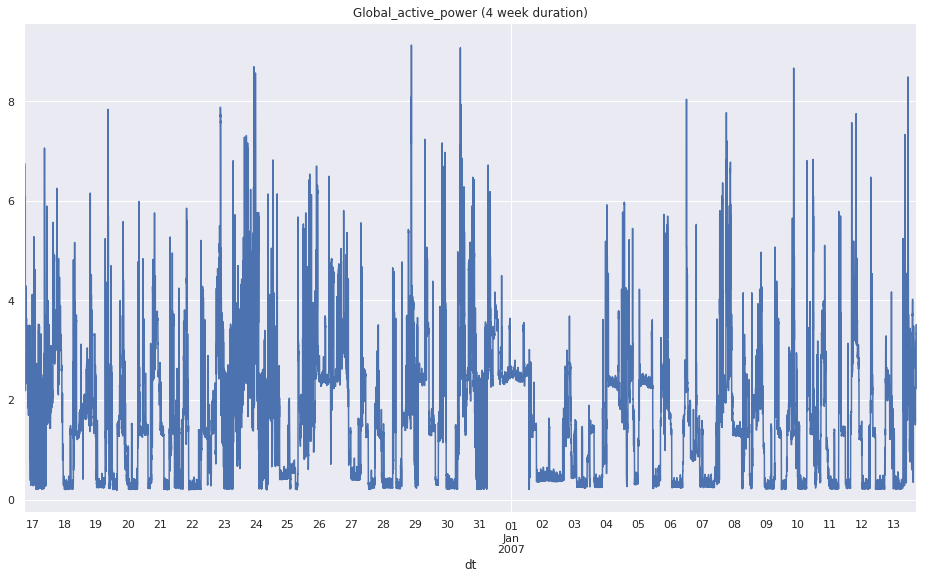

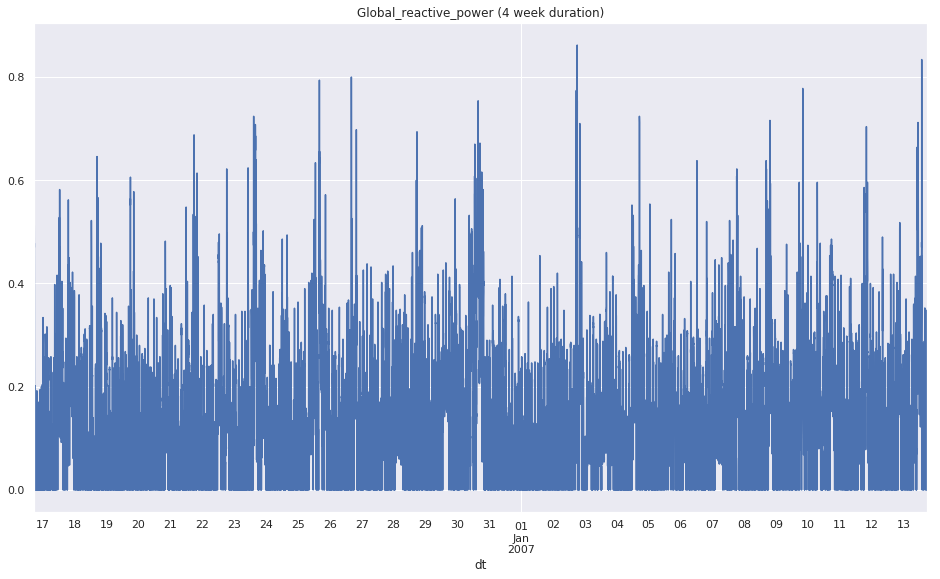

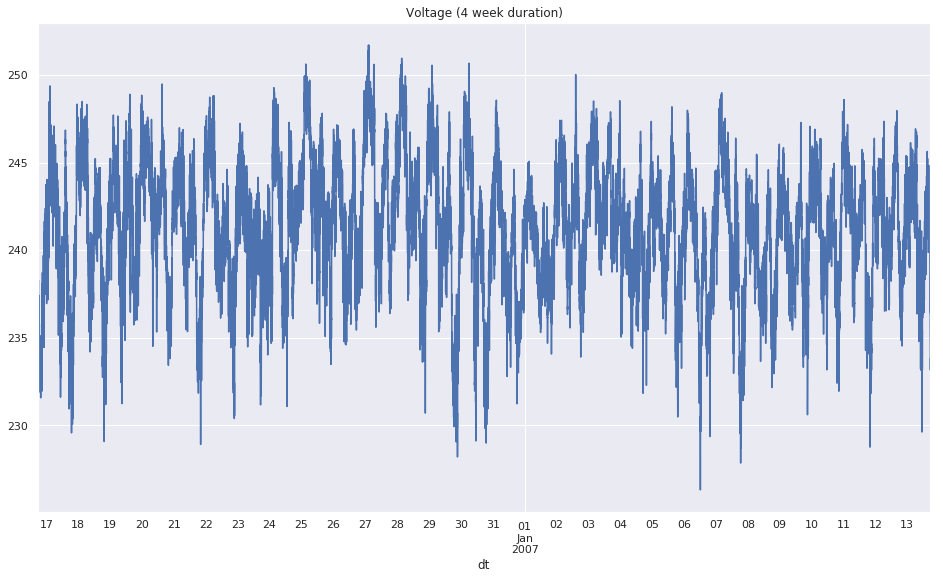

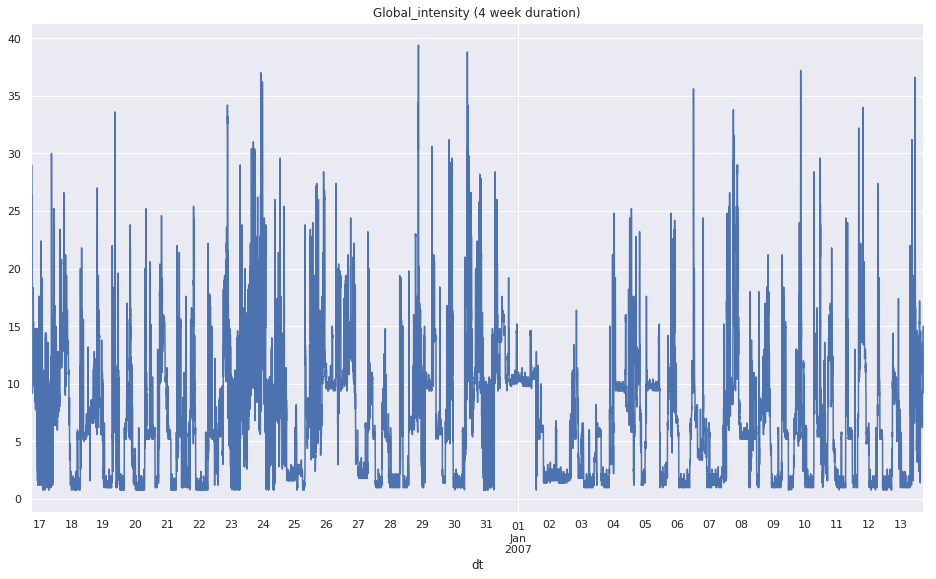

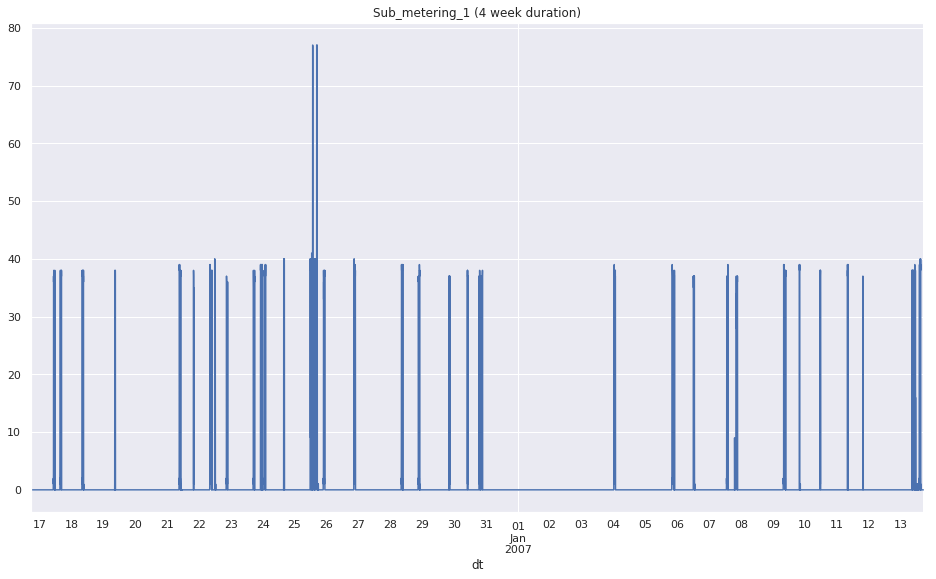

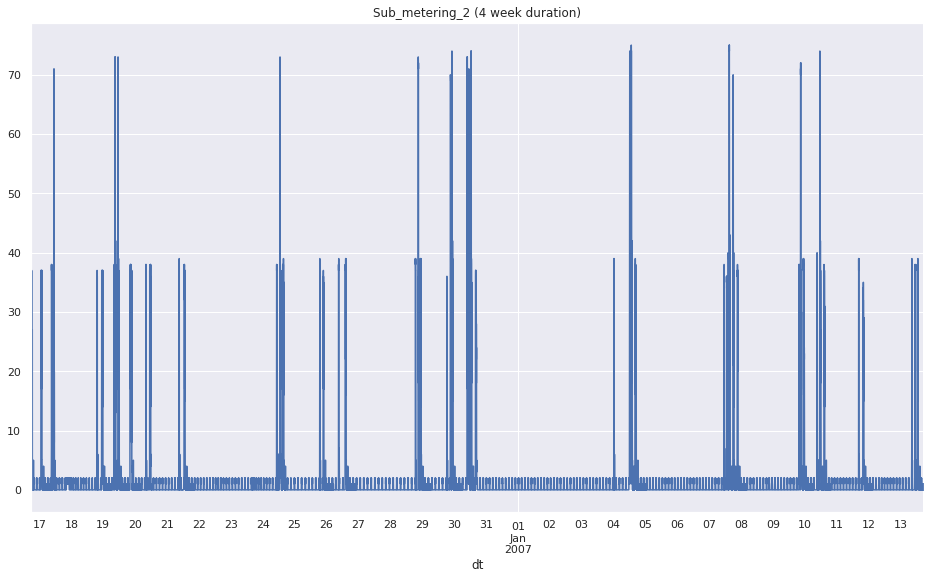

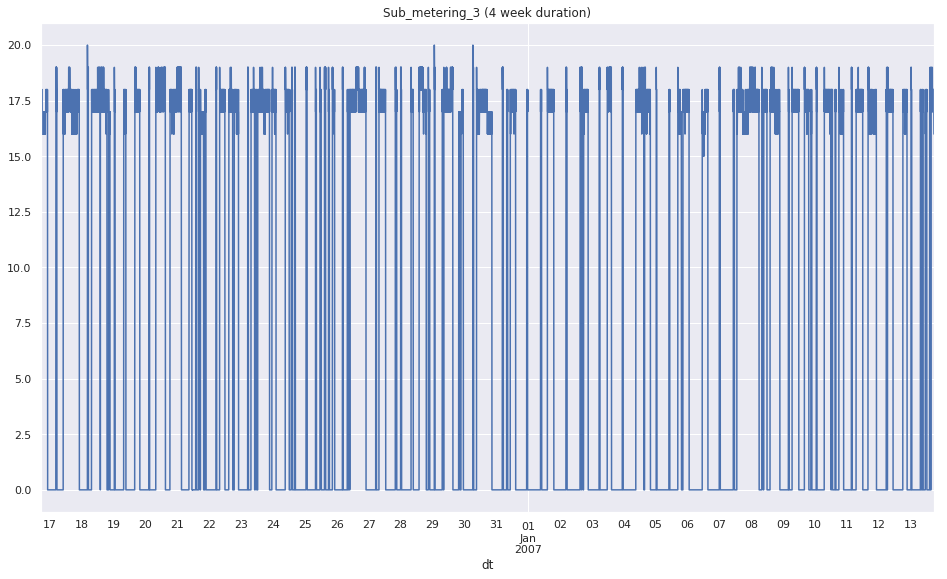

In [4]:
for column in data.columns:
    plt.figure(figsize=(16, 9))
    plt.title(f'{column} (4 week duration)')
    data[column][:60*24*28].plot()
    plt.show()

In [4]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [5]:
first_day = data[data.index.date == date(2009, 12, 16)]

In [6]:
second_day = data[data.index.date == date(2009, 12, 17)]

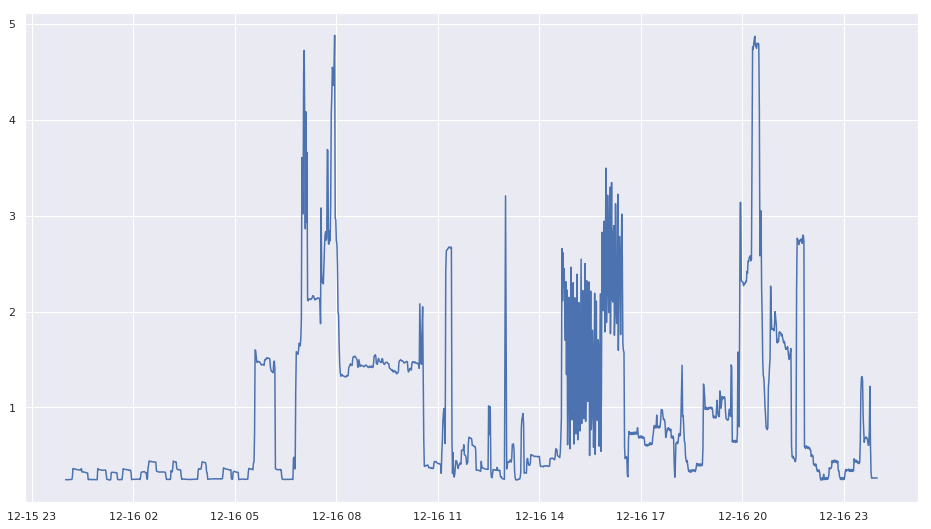

In [7]:
plt.figure(figsize=(16,9))
sns.lineplot(data=first_day.iloc[:, 0])

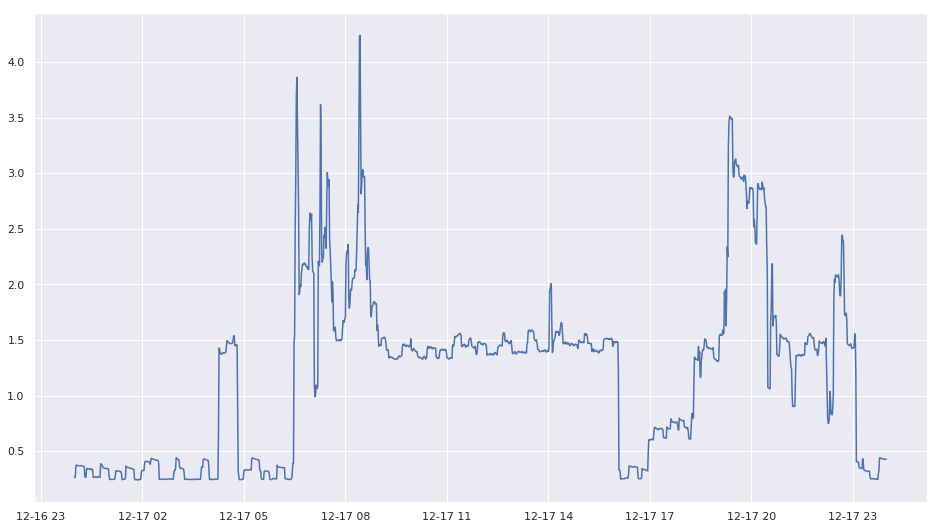

In [8]:
plt.figure(figsize=(16,9))
sns.lineplot(data=second_day.iloc[:, 0])

In [10]:
for j in range(0,7):        
        data.iloc[:,j]=data.iloc[:,j].fillna(data.iloc[:,j].mean())

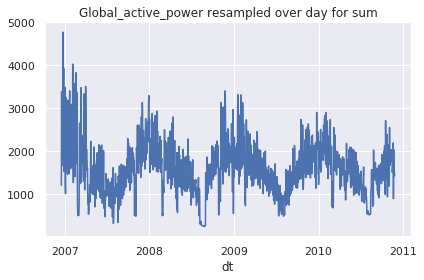

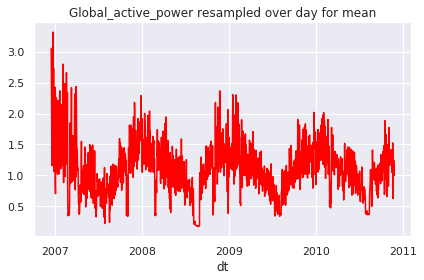

In [13]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

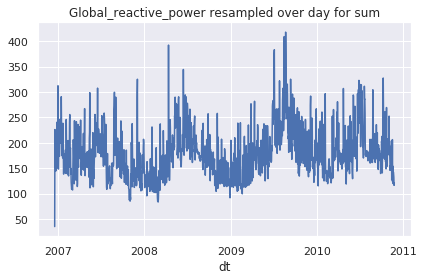

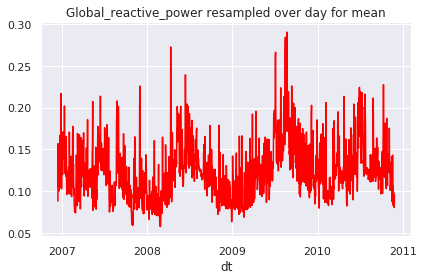

In [14]:
df.Global_reactive_power.resample('D').sum().plot(title='Global_reactive_power resampled over day for sum') 
plt.tight_layout()
plt.show()   

df.Global_reactive_power.resample('D').mean().plot(title='Global_reactive_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

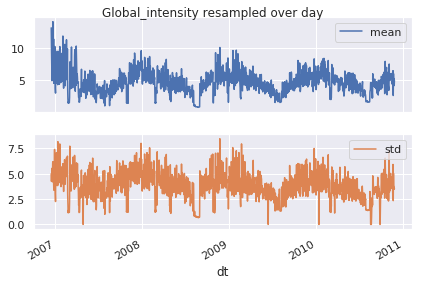

In [16]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.tight_layout()
plt.show()

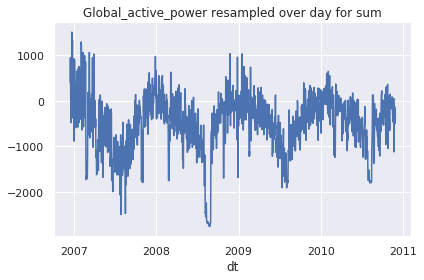

In [17]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

# Fbprophet

### TODO: Write small description. Pros ans cons.

In [4]:
from fbprophet import Prophet

In [5]:
prediction_size = 14

df = data[['Global_active_power']].copy()
df = df.resample('D').apply(sum)
df.reset_index(inplace=True)
df.columns = ['ds', 'y']
df.tail()

,ds,y
1437,2010-11-22,2041.536
1438,2010-11-23,1577.536
1439,2010-11-24,1796.248
1440,2010-11-25,1431.164
1441,2010-11-26,1488.104


In [6]:
train_df = df[:-prediction_size]

In [7]:
model = Prophet()
model.fit(train_df)

/home/quantum/anaconda3/envs/workshop/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future_dataframe = model.make_future_dataframe(periods=prediction_size, freq='D')
future_dataframe.tail()

,ds
1437,2010-11-22
1438,2010-11-23
1439,2010-11-24
1440,2010-11-25
1441,2010-11-26


In [9]:
forecast = model.predict(future_dataframe)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1437,2010-11-22,1536.974548,1424.621448,2537.902078,1536.974548,1536.974548,440.571542,440.571542,440.571542,-128.880563,-128.880563,-128.880563,569.452105,569.452105,569.452105,0.0,0.0,0.0,1977.546089
1438,2010-11-23,1536.975173,1550.373212,2655.410910,1536.975173,1536.975173,552.846563,552.846563,552.846563,-19.559544,-19.559544,-19.559544,572.406107,572.406107,572.406107,0.0,0.0,0.0,2089.821736
1439,2010-11-24,1536.975798,1523.541899,2676.504301,1536.975798,1536.975798,563.334039,563.334039,563.334039,-8.039105,-8.039105,-8.039105,571.373143,571.373143,571.373143,0.0,0.0,0.0,2100.309837
1440,2010-11-25,1536.976424,1407.237613,2474.498543,1536.976424,1536.976424,412.738017,412.738017,412.738017,-153.941144,-153.941144,-153.941144,566.679161,566.679161,566.679161,0.0,0.0,0.0,1949.714441
1441,2010-11-26,1536.977049,1473.322292,2621.776985,1536.977023,1536.977334,503.029890,503.029890,503.029890,-55.706390,-55.706390,-55.706390,558.736280,558.736280,558.736280,0.0,0.0,0.0,2040.006939


/home/quantum/anaconda3/envs/workshop/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



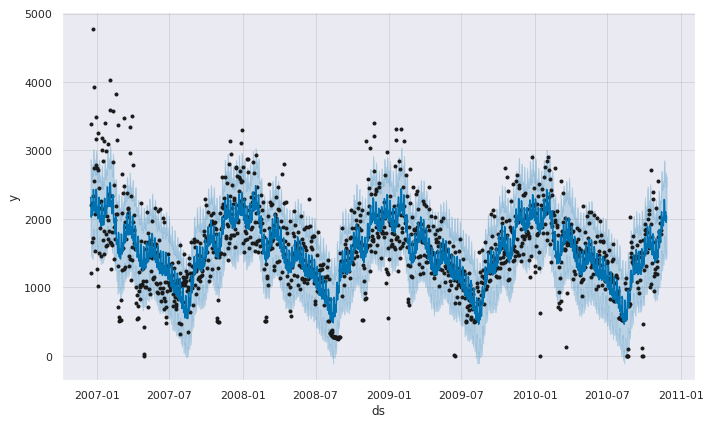

In [10]:
model.plot(forecast);

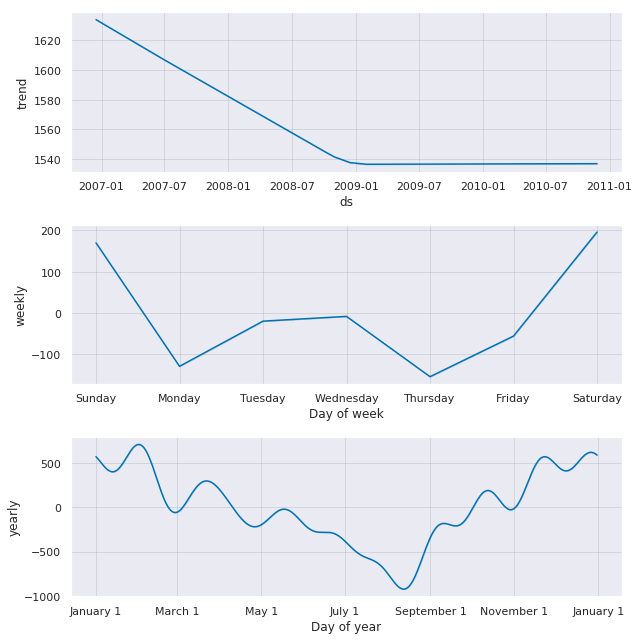

In [95]:
model.plot_components(forecast);

In [11]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

## TODO: Write MAPE, MAE formulas. Make the sane return.

In [12]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [13]:
cmp_df = make_comparison_dataframe(df, forecast)
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 28.266160529047347
MAE 373.8182441061852


## TODO: Deal with Plotly

In [21]:
def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode='lines')
        args.update(kwargs)
        return go.Scatter(**args)

In [22]:
def show_forecast(cmp_df, num_predictions, num_values, title):
    """Visualize the forecast."""
    
    lower_bound = create_go('Lower Bound', 'yhat_lower', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="444"))
    upper_bound = create_go('Upper Bound', 'yhat_upper', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="444"),
                            fillcolor='rgba(68, 68, 68, 0.3)', 
                            fill='tonexty')
    forecast = create_go('Forecast', 'yhat', num_predictions,
                         line=dict(color='rgb(31, 119, 180)'))
    actual = create_go('Actual', 'y', num_values,
                       marker=dict(color="red"))
    
    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title='y'), title=title, showlegend=True)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, prediction_size, 100, 'Prediction')